<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
zoo = pd.read_csv('/content/Zoo.csv')

In [4]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [8]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [9]:
zoo[zoo['animal name']=='frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [10]:
zoo = pd.read_csv('/content/Zoo.csv')

In [11]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
zoo['animal name'][(zoo.venomous==1)&(zoo['animal name']=='frog')]= 'ven_frog'

In [13]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [14]:
zoo[zoo['animal name']=='ven_frog']

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
26,ven_frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [15]:
hair_color = [('red'if i==1 else 'blue' if i==0 else yellow) for i in zoo.hair]

In [16]:
hair_color = list(set(hair_color))

In [17]:
hair_color

['red', 'blue']

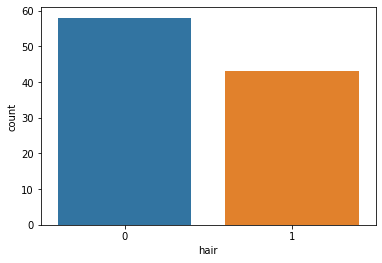

In [18]:
sns.countplot(x='hair', data=zoo)

In [19]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

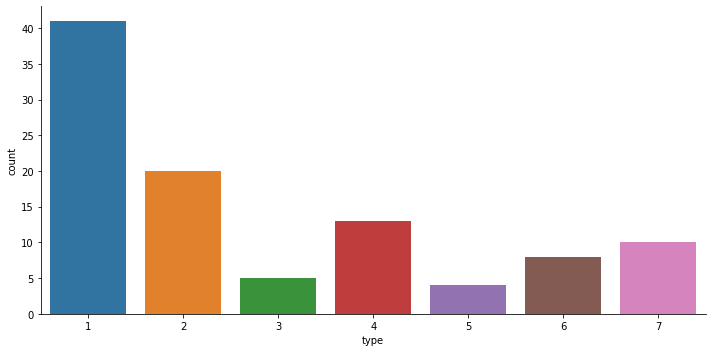

In [22]:
sns.factorplot('type', data=zoo, kind = 'count', size=5, aspect=2)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X =zoo.iloc[:,1:17]
Y = zoo.iloc[:,17]

In [29]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [30]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 20,stratify= Y)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, Y_train)
y_pred_KNN= clf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
scores_KNN = []
accu = accuracy_score(Y_test, y_pred_KNN)

In [36]:
scores_KNN.append(accu)

In [37]:
scores_KNN

[0.8064516129032258]

In [38]:
accu

0.8064516129032258

In [40]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(clf,X,Y,cv=10)


In [41]:
cvs

array([0.90909091, 0.9       , 0.8       , 0.9       , 1.        ,
       0.9       , 0.9       , 0.8       , 0.8       , 0.9       ])

In [42]:
cvs.mean()

0.8809090909090909

Hyperparameter tuning using Gridsearchcv

In [43]:
K_range = np.arange(1,10)
param_grid = dict(n_neighbors = K_range)
from sklearn.model_selection import GridSearchCV

In [45]:
gscv = GridSearchCV(clf,param_grid,scoring='accuracy',cv=10,return_train_score=False,verbose=1)
gscv.fit(X_train,Y_train)


Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy', verbose=1)

In [50]:
a =gscv.best_params_

In [47]:
gscv.score

<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy', verbose=1)>

In [48]:
accuracy = gscv.best_score_*100

In [49]:
accuracy

95.71428571428572

In [51]:
print(f'Best score and ideal neighbors for model building is {accuracy} & {a} respectively')

Best score and ideal neighbors for model building is 95.71428571428572 & {'n_neighbors': 1} respectively


In [53]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
score_Knn = accuracy_score(Y_test,y_pred) * 100
print(f'The accuracy for the model is {score_Knn} with n_neighbors=1')

The accuracy for the model is 96.7741935483871 with n_neighbors=1


In [55]:
from sklearn.metrics import confusion_matrix,classification_report

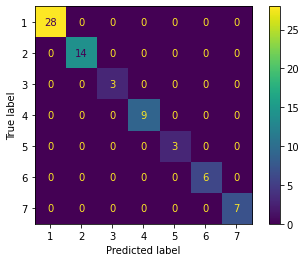

In [57]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
plot_confusion_matrix(gscv,X_train,Y_train,values_format ='d')

In [58]:
cm = confusion_matrix(Y_test, y_pred)

In [59]:
cm

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  3]])

In [60]:
clf_rep = classification_report(Y_test,y_pred)

In [63]:
print(clf_rep)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.93      0.93      0.90        31
weighted avg       0.98      0.97      0.97        31

